### Retention Rate & Purchase Rate Analysis

In [12]:
import pandas as pd

file_path = '/Users/rachelyou/Downloads/dataset_v1.csv'
data= pd.read_csv(file_path)

data.head()

,Unnamed: 0,C1AccountNo,CXRecords,Comp Terr,1,2,3,4,5,6,7,8,9,10,11,12,Year,total_sales,encode
0,0,"A2061733054*,CNR",91470CV(.{82 W<,MCOW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,0.0,0
1,1,A2061733055$SC)`,91470EM$BC>5 W<,Southern,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,0.0,0
2,2,A2061733055&RY+5,91470ER(#7ZS W<,Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,0.0,0
3,3,A2061733055(MK58,91470DV#294$ W<,Midwest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,0.0,0
4,4,A2061733055)1@^M,91470EF%GL_Y W<,Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,0.0,0


In [3]:
unique_customers_per_year = data.groupby('Year')['C1AccountNo'].nunique().reset_index()
unique_customers_per_year.columns = ['Year', 'UniqueCustomers']

data_sorted = data.sort_values(by=['C1AccountNo', 'Year'])

data_sorted['PreviousYear'] = data_sorted.groupby('C1AccountNo')['Year'].shift(1)

# Customers retained if their PreviousYear exists
data_sorted['Retained'] = data_sorted['PreviousYear'].notnull()

# Calculate retention rate for each year
retention_per_year = data_sorted.groupby('Year')['Retained'].mean().reset_index()
retention_per_year.columns = ['Year', 'RetentionRate']

# Convert the rate to percentages
retention_per_year['RetentionRate'] = retention_per_year['RetentionRate'] * 100

retention_per_year


,Year,RetentionRate
0,2018,0.0
1,2019,100.0
2,2020,100.0
3,2021,100.0
4,2022,100.0
5,2023,100.0
6,2024,100.0


In [4]:

# Filter customers who made purchases (total_sales > 0)
customers_with_purchases = data[data['total_sales'] > 0].copy()

# Sort the customers and calculate returning status (appeared in more than one year)
customers_with_purchases_sorted = customers_with_purchases.sort_values(by=['C1AccountNo', 'Year'])
customers_with_purchases_sorted['PreviousYear'] = customers_with_purchases_sorted.groupby('C1AccountNo')['Year'].shift(1)
customers_with_purchases_sorted['Retained'] = customers_with_purchases_sorted['PreviousYear'].notnull()

# Calculate the number of returning customers who made purchases each year
returning_customers_with_purchases_per_year = customers_with_purchases_sorted[customers_with_purchases_sorted['Retained']].groupby('Year')['C1AccountNo'].nunique().reset_index()
returning_customers_with_purchases_per_year.columns = ['Year', 'ReturningCustomersWithPurchases']

# Sort the entire dataset by year and calculate retention for all customers
data_sorted = data.sort_values(by=['C1AccountNo', 'Year'])
data_sorted['PreviousYear'] = data_sorted.groupby('C1AccountNo')['Year'].shift(1)
data_sorted['Retained'] = data_sorted['PreviousYear'].notnull()

# Calculate the total retention rate per year (including those who did not make purchases)
total_retention_per_year = data_sorted[data_sorted['Retained']].groupby('Year')['C1AccountNo'].nunique().reset_index()
total_retention_per_year.columns = ['Year', 'TotalReturningCustomers']

# Merge both results to compare returning customers vs those who made purchases
combined_retention_data = pd.merge(total_retention_per_year, returning_customers_with_purchases_per_year, on='Year', how='left')
combined_retention_data['PurchaseRate'] = (combined_retention_data['ReturningCustomersWithPurchases'] / combined_retention_data['TotalReturningCustomers']) * 100

combined_retention_data


,Year,TotalReturningCustomers,ReturningCustomersWithPurchases,PurchaseRate
0,2019,121602,8477,6.971102
1,2020,121602,7598,6.248252
2,2021,121602,2136,1.756550
3,2022,121602,2537,2.086314
4,2023,121602,9130,7.508100
5,2024,121602,5582,4.590385


From 2019 to 2024, the number of returning customers remained constant at 121,602, but the purchase rates fluctuated significantly. In 2019, 8,477 customers (6.97%) made purchases, dropping to 7,598 (6.25%) in 2020 and a sharp decline to 2,136 (1.76%) in 2021. A modest recovery occurred in 2022 with 2,537 customers (2.09%), followed by a peak in 2023 with 9,130 customers (7.51%). However, this trend did not hold in 2024, where the number fell to 5,582 (4.59%). These fluctuations suggest the need for consistent customer engagement strategies to sustain purchasing behavior.

/var/folders/sg/qzv2ht5n005_wc213wfx60000000gn/T/ipykernel_3587/3563941121.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  inactivity_counts = data.groupby('C1AccountNo').apply(lambda x: (x['total_sales'] == 0).sum())


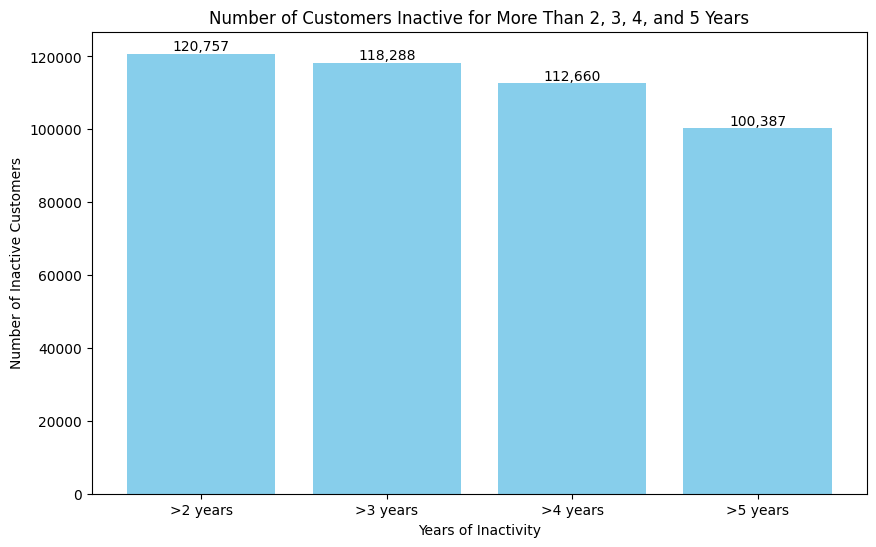

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by account number and aggregate to count the number of zero-sales years per customer
inactivity_counts = data.groupby('C1AccountNo').apply(lambda x: (x['total_sales'] == 0).sum())

# Determine the number of customers with more than 2, 3, 4, and 5 years of inactivity
inactive_more_than_2_years = inactivity_counts[inactivity_counts > 2].count()
inactive_more_than_3_years = inactivity_counts[inactivity_counts > 3].count()
inactive_more_than_4_years = inactivity_counts[inactivity_counts > 4].count()
inactive_more_than_5_years = inactivity_counts[inactivity_counts > 5].count()

# Data for visualization
years_of_inactivity = ['>2 years', '>3 years', '>4 years', '>5 years']
numbers_of_customers = [inactive_more_than_2_years, inactive_more_than_3_years, inactive_more_than_4_years, inactive_more_than_5_years]
# Enhancing the bar chart with specific numbers above each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(years_of_inactivity, numbers_of_customers, color='skyblue')

# Adding the text labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:,}', ha='center', va='bottom')

plt.xlabel('Years of Inactivity')
plt.ylabel('Number of Inactive Customers')
plt.title('Number of Customers Inactive for More Than 2, 3, 4, and 5 Years')
plt.show()



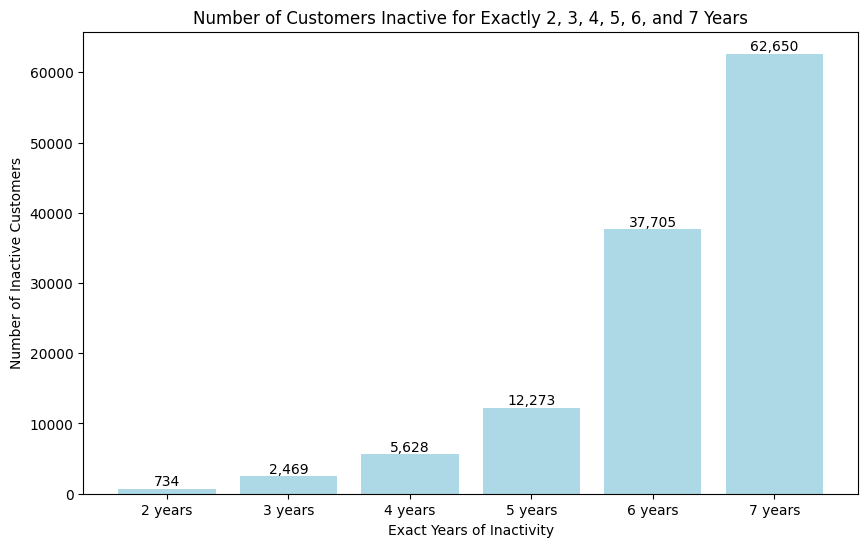

In [23]:
inactive_exactly_2_years = inactivity_counts[inactivity_counts == 2].count()
inactive_exactly_3_years = inactivity_counts[inactivity_counts == 3].count()
inactive_exactly_4_years = inactivity_counts[inactivity_counts == 4].count()
inactive_exactly_5_years = inactivity_counts[inactivity_counts == 5].count()
inactive_exactly_6_years = inactivity_counts[inactivity_counts == 6].count()
inactive_exactly_7_years = inactivity_counts[inactivity_counts == 7].count()

years_of_exact_inactivity.append('7 years')
numbers_of_customers_exact.append(inactive_exactly_7_years)

plt.figure(figsize=(10, 6))
bars_exact = plt.bar(years_of_exact_inactivity, numbers_of_customers_exact, color='lightblue')

for bar in bars_exact:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:,}', ha='center', va='bottom')

plt.xlabel('Exact Years of Inactivity')
plt.ylabel('Number of Inactive Customers')
plt.title('Number of Customers Inactive for Exactly 2, 3, 4, 5, 6, and 7 Years')
plt.show()



In [31]:
# Import necessary libraries
import pandas as pd

# Load your dataset
file_path = '/Users/rachelyou/Downloads/dataset_v1.csv'  # Update with your correct path
data = pd.read_csv(file_path)

# Step 1: Group the dataset by customer and year to get those who made a purchase in each year.
customers_by_year = data[data.iloc[:, 4:16].gt(0).any(axis=1)].groupby(['Year', 'C1AccountNo']).size().reset_index(name='purchase_made')

# Step 2: Define the function to calculate the retention rate
def calculate_filtered_retention_rate(data):
    retention_data = []
    years = sorted(data['Year'].unique())  # Get the list of years
    
    for i in range(1, len(years)):  # Start from the second year to compare with the previous year
        current_year = years[i]
        previous_year = years[i - 1]
        
        # Get customers who made purchases in the previous year
        previous_year_customers = set(data[data['Year'] == previous_year]['C1AccountNo'])
        
        # Get customers who made purchases in the current year
        current_year_customers = set(data[data['Year'] == current_year]['C1AccountNo'])
        
        # Find customers who made purchases in both years (retained customers)
        retained_customers = previous_year_customers.intersection(current_year_customers)
        
        # Calculate the retention rate
        retention_rate = (len(retained_customers) / len(previous_year_customers)) * 100 if previous_year_customers else 0
        
        # Append the results to a list
        retention_data.append({
            'Year': current_year,
            'Customers_in_Previous_Year': len(previous_year_customers),
            'Customers_in_Current_Year': len(current_year_customers),
            'Retained_Customers': len(retained_customers),
            'Retention_Rate (%)': f"{retention_rate:.2f}"  # Formatting the retention rate
        })
    
    # Convert the results to a DataFrame for better display
    return pd.DataFrame(retention_data)

# Step 3: Recalculate the retention rates based on filtered customers
filtered_retention_df = calculate_filtered_retention_rate(customers_by_year)

# Step 4: Display the filtered retention rates in a nicely formatted table
print(filtered_retention_df.to_string(index=False))


 Year  Customers_in_Previous_Year  Customers_in_Current_Year  Retained_Customers Retention_Rate (%)
 2019                       11510                      11882                8873              77.09
 2020                       11882                       9803                7820              65.81
 2021                        9803                      10478                1644              16.77
 2022                       10478                      10806                1268              12.10
 2023                       10806                      37062                2939              27.20
 2024                       37062                       7070                6037              16.29
